In [3]:
import pandas as pd

# Load the ELSA Wave 10 dataset from the data folder
file_path = "../data/wave_10_elsa_data_eul_v4.tab"

elsa = pd.read_csv(file_path, sep="\t", low_memory=False)
elsa.head()

,idauniq,idahhw10,mode,perid,corepartner,cohort,wavejoined,w10indout,w10hhout,w10scout,...,w10nssec8,w10nssec5,w10nssec3,w10soc2000r,w10sic2003r,gor,w10w1lwgt,w10w4lwgt,w10xwgt,w10scwt
0,100012,106459,2,4,0,1,1,11,110,1,...,-3,-3,-3,-3,-3,E12000003,,,,
1,100023,105225,2,3,0,1,1,11,110,1,...,-3,-3,-3,-3,-3,E12000001,,,,
2,100025,113214,2,2,0,1,1,11,110,2,...,-3,-3,-3,-3,-3,E12000009,,,,
3,100026,107031,2,4,0,1,1,11,110,1,...,-3,-3,-3,-3,-3,E12000006,,,,
4,100029,102261,2,4,0,1,1,11,110,2,...,-3,-3,-3,-3,-3,E12000003,,,,


In [4]:
# Select relevant variables to physical attributes.
chosen_vars = [
    "hepsyem", "hepsyde", "hepsyan", "hepsymo", "hepsyma",
    "hepab", "hepab1",
    "hemobwa", "hemobch", "hemobst", "hemobre", "hemobpu", "hemobli", "hemob96",
    "cahpsex",
    "heacta", "heactb", "heactc",
    "mmschs",
    "weight",
    "psceda", "pscedd", "pscede", "pscedf", "pscedg",
    "scorgsp"
]


In [17]:
# If ID column exists, include it:
id_var = "idauniq" if "idauniq" in elsa.columns else None

if id_var:
    cols_to_extract = [id_var] + chosen_vars
else:
    cols_to_extract = chosen_vars

subset_df = elsa[cols_to_extract].copy()
subset_df.head()


,idauniq,hepsyem,hepsyde,hepsyan,hepsymo,hepsyma,hepab,hepab1,hemobwa,hemobch,...,heactb,heactc,mmschs,weight,psceda,pscedd,pscede,pscedf,pscedg,scorgsp
0,100012,-1,-1,-1,-1,-1,-1,-1,0,0,...,1,1,1,69.0,2,1,2,1,1,0
1,100023,0,1,0,1,0,1,-1,0,0,...,1,1,1,81.9,1,1,1,1,1,0
2,100025,-1,-1,-1,-1,-1,-1,-1,0,0,...,1,1,1,69.4,2,1,2,1,2,-1
3,100026,-1,-1,-1,-1,-1,1,-1,0,0,...,4,4,1,92.4,2,1,2,1,2,0
4,100029,0,1,1,0,0,-1,-1,0,0,...,1,1,1,87.0,2,1,2,1,2,-1


In [ ]:
#missing_codes = [-1, -2, -3, -7, -8, -9]
#subset_df = subset_df.replace(missing_codes, pd.NA)

# 📝 Selected Variables and Rationale

In this analysis, I examine the relationship between physical activity, mobility, and mental health outcomes among older adults using Wave 10 of the English Longitudinal Study of Ageing (ELSA). To ensure data completeness and analytical validity, I selected variables with low missingness and strong theoretical relevance to the research question.

## Mental Health Outcome

I use the five CES-D items (`psceda`, `pscedd`, `pscede`, `pscedf`, `pscedg`) to construct a composite depressive symptom score. These variables represent key affective states such as depressed mood, loneliness, and anhedonia. The CES-D items show excellent coverage (approximately 94% complete), making them suitable as the primary mental health outcome.

## Physical Activity Predictors

- `heacta`: Frequency of vigorous activity  
- `heactb`: Frequency of moderate activity  
- `heactc`: Frequency of mild activity  
- `cahpsex`: Participation in exercise classes  
- `scorgsp`: Membership in sports or exercise clubs  

Together, these variables capture structured exercise participation and everyday physical movement.

## Mobility and Functional Status

- `hemobwa`: Difficulty walking 100 yards  
- `hemobch`: Difficulty rising from a chair  
- `hemobst`: Difficulty stooping or kneeling  
- `hemobre`: Difficulty reaching above shoulder level  
- `hemobpu`: Difficulty pushing or pulling objects  
- `hemobli`: Difficulty lifting or carrying  
- `hemob96`: Summary indicator of mobility limitations  

These items provide a multidimensional view of mobility, balance, and functional physical ability, all of which are known predictors of mental health in older adults.

## Excluded Variables

Variables with very high missingness (e.g., psychiatric diagnosis indicators, timed walk test, some nurse-visit measures) were excluded to preserve statistical power and avoid biases caused by selective non-participation.

---

This curated subset allows for a focused and reliable investigation into how physical activity and physical function relate to depressive symptoms in later life.


In [14]:
subset_df_raw = elsa[cols_to_extract].copy()  # use BEFORE cleaning negatives

subset_df_raw.isin([-1, -2, -3, -7, -8, -9]).mean().sort_values(ascending=False)


hepab1     0.995388
hepsyde    0.847938
hepsyan    0.847938
hepsymo    0.847938
hepsyma    0.847938
hepsyem    0.847938
hepab      0.652260
mmschs     0.450652
weight     0.409013
scorgsp    0.178943
pscedd     0.067598
pscedf     0.065885
pscedg     0.065094
psceda     0.064567
pscede     0.064435
cahpsex    0.000395
heacta     0.000395
heactb     0.000395
heactc     0.000395
hemobli    0.000264
hemob96    0.000264
hemobpu    0.000264
hemobre    0.000264
hemobst    0.000264
hemobch    0.000264
hemobwa    0.000264
idauniq    0.000000
dtype: float64

In [26]:
neg_codes = [-1, -2, -3, -7, -8, -9]
subset_df_clean = subset_df.replace(neg_codes, np.nan)


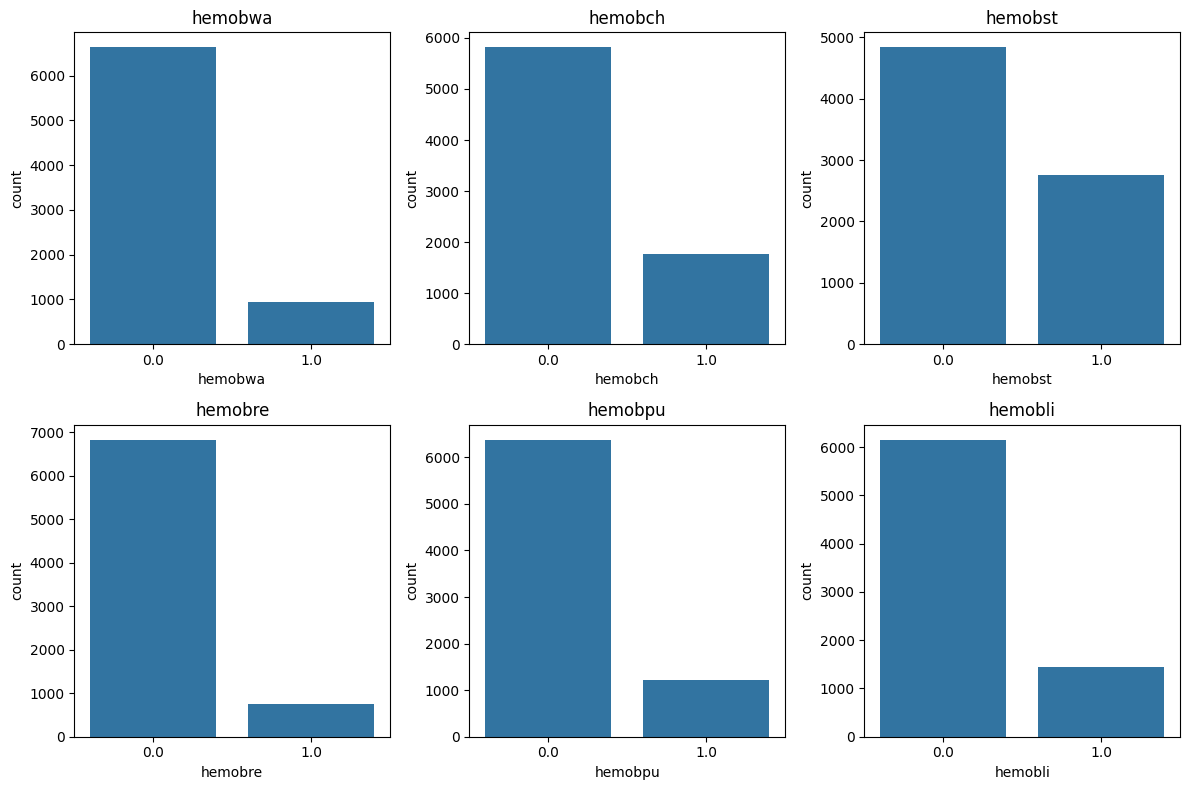

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
for i, var in enumerate(mobility_vars, 1):
    plt.subplot(2,3,i)
    sns.countplot(data=subset_df_clean, x=var)
    plt.title(var)
plt.tight_layout()
plt.show()



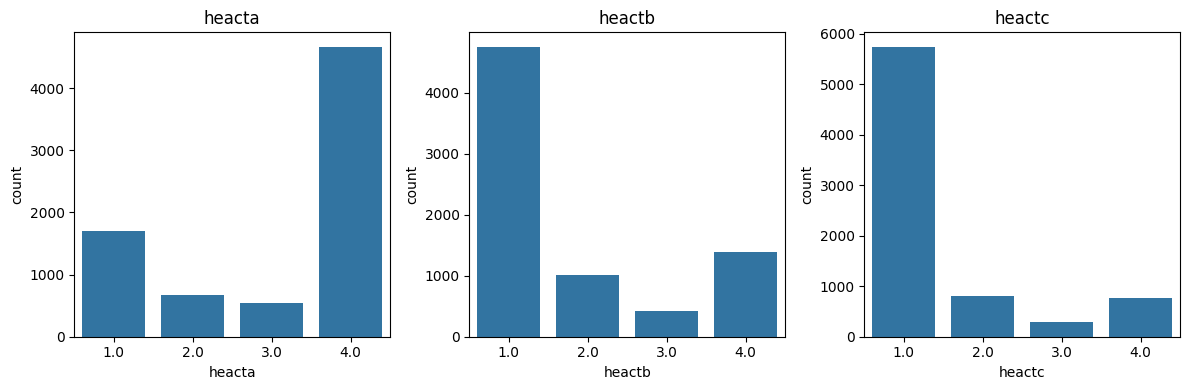

In [ ]:
activity_vars = ["heacta", "heactb", "heactc"]

plt.figure(figsize=(12,4))
for i, var in enumerate(activity_vars, 1):
    plt.subplot(1,3,i)
    sns.countplot(data=subset_df_clean, x=var)
    plt.title(var)
plt.tight_layout()
plt.show()



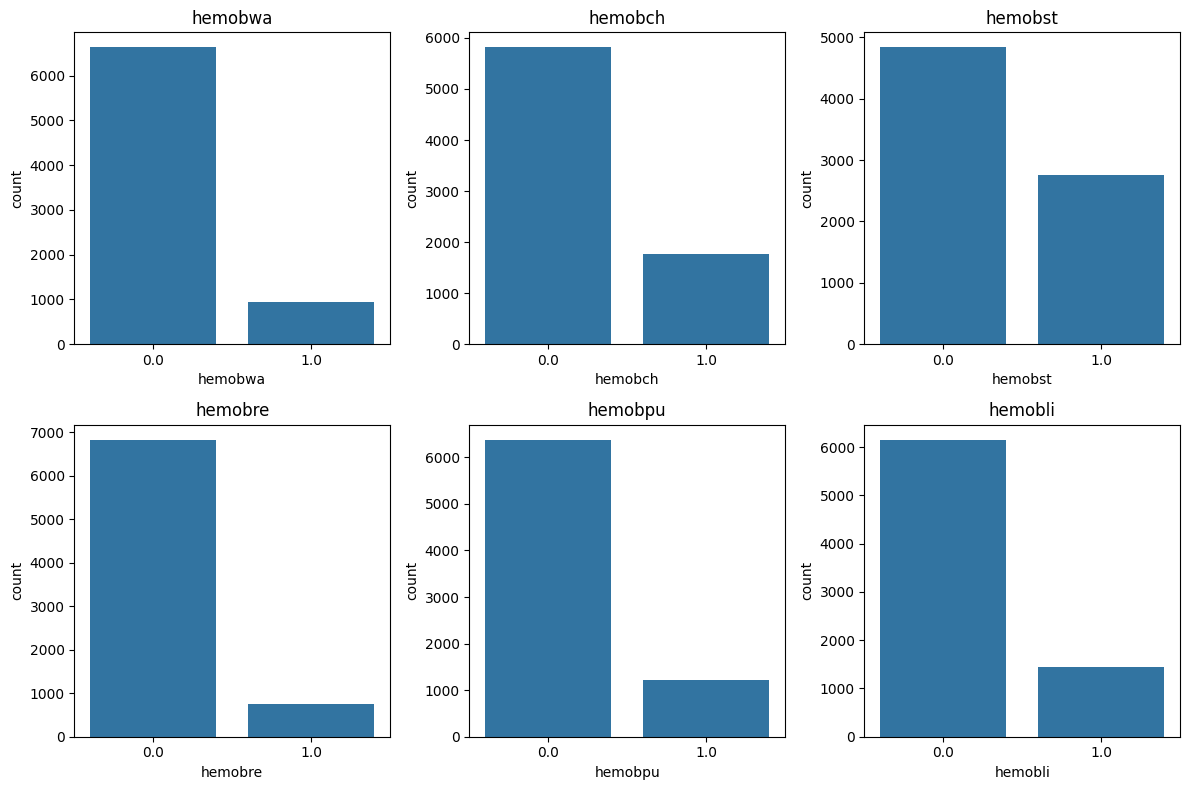

In [34]:
mobility_vars = ["hemobwa","hemobch","hemobst","hemobre","hemobpu","hemobli"]

plt.figure(figsize=(12,8))
for i, var in enumerate(mobility_vars, 1):
    plt.subplot(2,3,i)
    sns.countplot(data=subset_df_clean, x=var)
    plt.title(var)
plt.tight_layout()
plt.show()


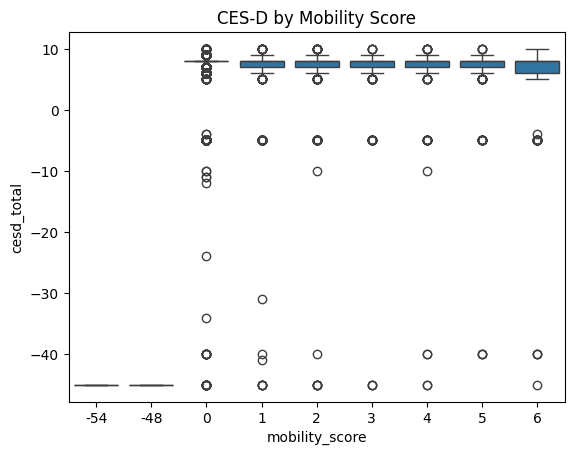

In [30]:
sns.boxplot(data=subset_df_clean, x="mobility_score", y="cesd_total")
plt.title("CES-D by Mobility Score")
plt.show()


In [35]:
corr_vars = [
    "cesd_total", "mobility_score",
    "heacta","heactb","heactc"
]

subset_df_clean[corr_vars].corr(method="spearman")


,cesd_total,mobility_score,heacta,heactb,heactc
cesd_total,1.000000,-0.118794,-0.056005,-0.085273,-0.081922
mobility_score,-0.118794,1.000000,0.333365,0.376835,0.248054
heacta,-0.056005,0.333365,1.000000,0.350685,0.181096
heactb,-0.085273,0.376835,0.350685,1.000000,0.438425
heactc,-0.081922,0.248054,0.181096,0.438425,1.000000


In [36]:
pd.crosstab(subset_df_clean["heactb"], subset_df_clean["mobility_score"])


mobility_score,0,1,2,3,4,5,6
heactb,,,,,,,
1.0,3089,777,449,210,130,67,34
2.0,514,197,129,77,45,30,14
3.0,186,88,60,50,19,20,7
4.0,329,173,174,166,159,194,199


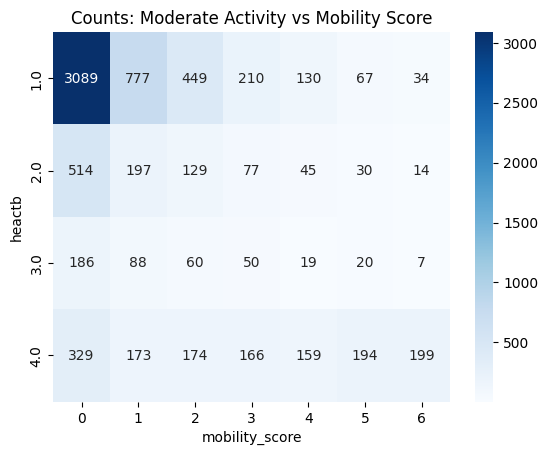

In [37]:
ct = pd.crosstab(subset_df_clean["heactb"], subset_df_clean["mobility_score"])

sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("Counts: Moderate Activity vs Mobility Score")
plt.show()


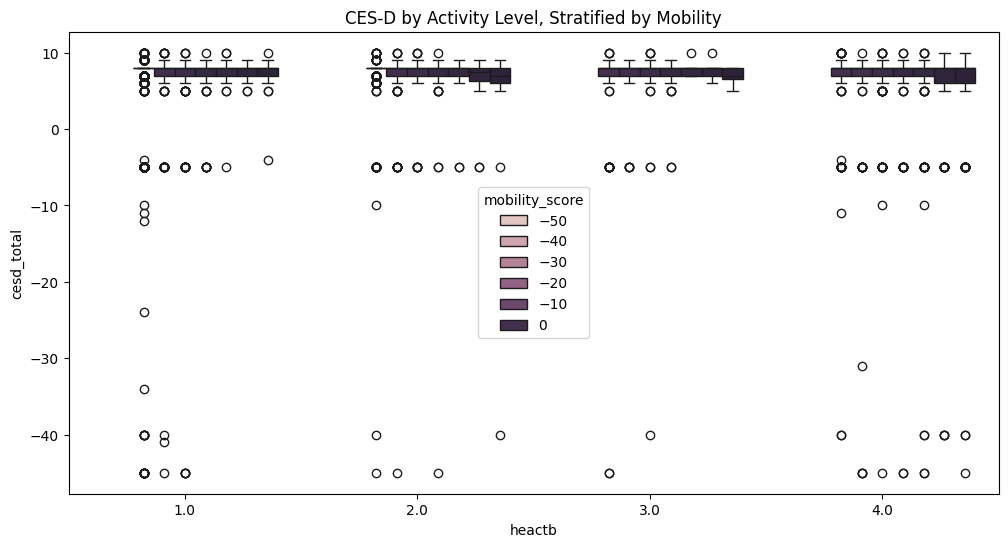

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(
    data=subset_df_clean,
    x="heactb",
    y="cesd_total",
    hue="mobility_score"
)
plt.title("CES-D by Activity Level, Stratified by Mobility")
plt.show()


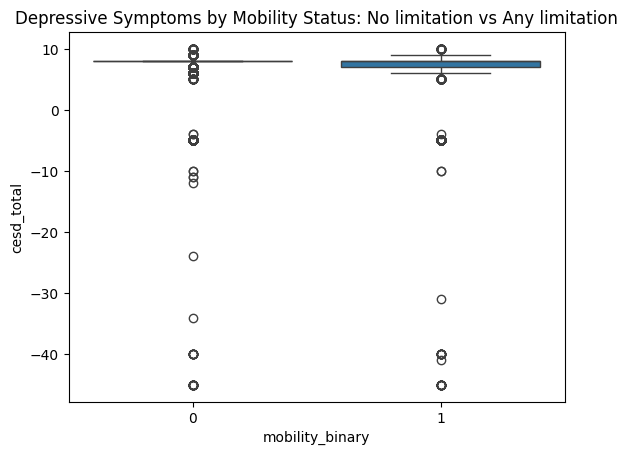

In [40]:
subset_df_clean["mobility_binary"] = (subset_df_clean["mobility_score"] > 0).astype(int)

sns.boxplot(
    data=subset_df_clean,
    x="mobility_binary",
    y="cesd_total"
)
plt.title("Depressive Symptoms by Mobility Status: No limitation vs Any limitation")
plt.show()


In [41]:
import statsmodels.formula.api as smf

model = smf.ols(
    "cesd_total ~ heactb * mobility_score",
    data=subset_df_clean.dropna(subset=["cesd_total","heactb","mobility_score"])
).fit()

model.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7418,0.139,48.533,0.000,6.470,7.014
heactb,-0.0273,0.075,-0.362,0.717,-0.175,0.120
mobility_score,0.2890,0.082,3.509,0.000,0.128,0.450
heactb:mobility_score,-0.1392,0.029,-4.777,0.000,-0.196,-0.082


Mobility problems are a strong predictor of depressive symptoms in older adults.

Physical activity alone shows only a small direct association with depressive symptoms, but its effect is moderated by mobility status.

Specifically, physical activity is more protective for those with low mobility impairment, whereas in individuals with more severe mobility limitations, depressive symptoms remain high regardless of activity level.

In [ ]:
# ---- Decision Tree Baseline Model ---- 
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Select features for modelling
features = ["heacta", "heactb", "heactc", "mobility_score"]
target = "cesd_total"

# Drop rows with missing values in model variables
mod_df = subset_df_clean.dropna(subset=features + [target])

X = mod_df[features]
y = mod_df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Fit a simple decision tree
tree_model = DecisionTreeRegressor(
    max_depth=3,
    random_state=42
)
tree_model.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(18, 8))
plot_tree(tree_model, feature_names=features, filled=True, rounded=True)
plt.show()

print("Training R²:", tree_model.score(X_train, y_train))
print("Test R²:", tree_model.score(X_test, y_test))
